In [66]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
plt.style.use("fivethirtyeight")

In [78]:
train_dir = "/mnt/c/Users/iosif/Desktop/Python/Tensorflow/101_food_classes_10_percent/train"
test_dir = "/mnt/c/Users/iosif/Desktop/Python/Tensorflow/101_food_classes_10_percent/test"
#-------------------------------------
train_data_10p = tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir,
                                                                     label_mode="categorical",
                                                                     image_size=(224,224))

test_data = tf.keras.preprocessing.image_dataset_from_directory(directory=test_dir,
                                                                     label_mode="categorical",
                                                                     image_size=(224,224),
                                                                     shuffle=False)

Found 7575 files belonging to 101 classes.
Found 25250 files belonging to 101 classes.


In [65]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomHeight(0.2),
    tf.keras.layers.RandomWidth(0.2),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(0.2),
])

In [4]:
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False
# Build
inputs = tf.keras.Input(shape=(224,224,3))
x = data_augmentation(inputs)
x = base_model(x, training=False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dropout(0.2)(x)
output = tf.keras.layers.Dense(101, activation="softmax")(x)
efi_food_1 = tf.keras.Model(inputs, output)
# Compile
efi_food_1.compile(loss="categorical_crossentropy",
                   optimizer=tf.keras.optimizers.Adam(),
                   metrics=["accuracy"])
# Fit
stop_early = tf.keras.callbacks.EarlyStopping(patience=5)

hist_1 = efi_food_1.fit(epochs=100,
                        x=train_data_10p,
                        validation_data=test_data,
                        steps_per_epoch=len(train_data_10p),
                        validation_steps=int(0.2*len(test_data)),
                        callbacks=[stop_early])

Epoch 1/100


I0000 00:00:1737545935.572068   76437 cuda_dnn.cc:529] Loaded cuDNN version 90300


237/237 ━━━━━━━━━━━━━━━━━━━━ 26s 86ms/step - accuracy: 0.1363 - loss: 4.0645 - val_accuracy: 0.4628 - val_loss: 2.4295
Epoch 2/100
237/237 ━━━━━━━━━━━━━━━━━━━━ 18s 77ms/step - accuracy: 0.4352 - loss: 2.4785 - val_accuracy: 0.5358 - val_loss: 1.9527
Epoch 3/100
237/237 ━━━━━━━━━━━━━━━━━━━━ 18s 76ms/step - accuracy: 0.5211 - loss: 2.0462 - val_accuracy: 0.5568 - val_loss: 1.7637
Epoch 4/100
237/237 ━━━━━━━━━━━━━━━━━━━━ 18s 75ms/step - accuracy: 0.5618 - loss: 1.8084 - val_accuracy: 0.5690 - val_loss: 1.6744
Epoch 5/100
237/237 ━━━━━━━━━━━━━━━━━━━━ 18s 75ms/step - accuracy: 0.5918 - loss: 1.6506 - val_accuracy: 0.5856 - val_loss: 1.6024
Epoch 6/100
237/237 ━━━━━━━━━━━━━━━━━━━━ 18s 75ms/step - accuracy: 0.6008 - loss: 1.5773 - val_accuracy: 0.5918 - val_loss: 1.5705
Epoch 7/100
237/237 ━━━━━━━━━━━━━━━━━━━━ 18s 75ms/step - accuracy: 0.6198 - loss: 1.4967 - val_accuracy: 0.5932 - val_loss: 1.5446
Epoch 8/100
237/237 ━━━━━━━━━━━━━━━━━━━━ 18s 75ms/step - accuracy: 0.6437 - loss: 1.3957 - val_

In [5]:
initial_epoch = hist_1.epoch[-1] +1
base_model.trainable= True

for layer in base_model.layers[:-10]:
    layer.trainable=False
    
efi_food_1.compile(loss="categorical_crossentropy",
                   optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                   metrics=["accuracy"])

hist_1_fine = efi_food_1.fit(epochs=100,
                             initial_epoch=initial_epoch,
                             steps_per_epoch=len(train_data_10p),
                             validation_steps=int(0.2*len(test_data)),
                             x=train_data_10p,
                             validation_data=test_data,
                             callbacks=[stop_early])


Epoch 24/100


E0000 00:00:1737546328.113762   76313 meta_optimizer.cc:966] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inStatefulPartitionedCall/functional_1_1/efficientnetb0_1/block2b_drop_1/stateless_dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


237/237 ━━━━━━━━━━━━━━━━━━━━ 23s 73ms/step - accuracy: 0.7150 - loss: 1.0399 - val_accuracy: 0.6050 - val_loss: 1.5299
Epoch 25/100
237/237 ━━━━━━━━━━━━━━━━━━━━ 16s 67ms/step - accuracy: 0.7721 - loss: 0.8560 - val_accuracy: 0.6090 - val_loss: 1.5305
Epoch 26/100
237/237 ━━━━━━━━━━━━━━━━━━━━ 16s 66ms/step - accuracy: 0.7810 - loss: 0.8157 - val_accuracy: 0.6090 - val_loss: 1.5162
Epoch 27/100
237/237 ━━━━━━━━━━━━━━━━━━━━ 15s 63ms/step - accuracy: 0.7952 - loss: 0.7600 - val_accuracy: 0.6078 - val_loss: 1.5158
Epoch 28/100
237/237 ━━━━━━━━━━━━━━━━━━━━ 15s 63ms/step - accuracy: 0.7960 - loss: 0.7339 - val_accuracy: 0.6173 - val_loss: 1.4903
Epoch 29/100
237/237 ━━━━━━━━━━━━━━━━━━━━ 16s 66ms/step - accuracy: 0.8119 - loss: 0.7008 - val_accuracy: 0.6181 - val_loss: 1.4855
Epoch 30/100
237/237 ━━━━━━━━━━━━━━━━━━━━ 15s 63ms/step - accuracy: 0.8232 - loss: 0.6669 - val_accuracy: 0.6201 - val_loss: 1.4914
Epoch 31/100
237/237 ━━━━━━━━━━━━━━━━━━━━ 15s 63ms/step - accuracy: 0.8332 - loss: 0.6201

# Save/ load the model

In [12]:
efi_food_1.save("/mnt/c/Users/iosif/Desktop/Python/Tensorflow/EfficientNet_food_101.keras")
loaded_efi = tf.keras.models.load_model("/mnt/c/Users/iosif/Desktop/Python/Tensorflow/EfficientNet_food_101.keras")
loaded_efi.evaluate(test_data)

790/790 ━━━━━━━━━━━━━━━━━━━━ 22s 25ms/step - accuracy: 0.6237 - loss: 1.4760


[1.4842523336410522, 0.6228514909744263]

# Evaluate

In [87]:
evaluation_results = loaded_efi.evaluate(test_data)

790/790 ━━━━━━━━━━━━━━━━━━━━ 20s 25ms/step - accuracy: 0.6010 - loss: 1.5904


In [ ]:
pred_props = efi_food_1.predict(test_data, verbose=1)

790/790 ━━━━━━━━━━━━━━━━━━━━ 18s 23ms/step


array([[1.0008897e-01, 8.4230007e-05, 5.6012079e-02, ..., 1.2072527e-06,
        9.8244986e-04, 2.4316437e-03],
       [9.9814904e-01, 7.9332327e-09, 1.0040534e-05, ..., 2.5549275e-04,
        2.3723310e-09, 1.2086042e-07],
       [5.4597449e-01, 1.0806649e-02, 2.5275169e-02, ..., 3.5701969e-04,
        1.4498395e-04, 2.4024013e-03],
       ...,
       [9.1451357e-06, 2.2130309e-02, 3.9372537e-07, ..., 2.6659895e-04,
        4.9773196e-04, 2.3084818e-01],
       [7.7276058e-03, 2.8963953e-02, 1.0058552e-03, ..., 1.2613580e-03,
        3.6690515e-05, 1.7436372e-01],
       [3.8270675e-02, 2.7380167e-03, 5.2819977e-04, ..., 6.2390760e-04,
        1.4536468e-04, 7.8530711e-01]], dtype=float32)

In [100]:
pred_classes = pred_props.argmax(axis=1)

In [79]:
y_labels = []
for images, labels in test_data.unbatch():
    y_labels.append(labels.numpy().argmax())

In [204]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_recall_curve, recall_score, roc_curve, f1_score, classification_report

sklearn_acu = accuracy_score(y_true=y_labels,
                             y_pred= pred_classes)

cm = confusion_matrix(y_pred=pred_classes,
                      y_true=y_labels)

rs = recall_score(y_true=y_labels,y_pred=pred_classes, average="micro")

cr = classification_report(y_true=y_labels,y_pred=pred_classes, output_dict=True)

<Axes: >

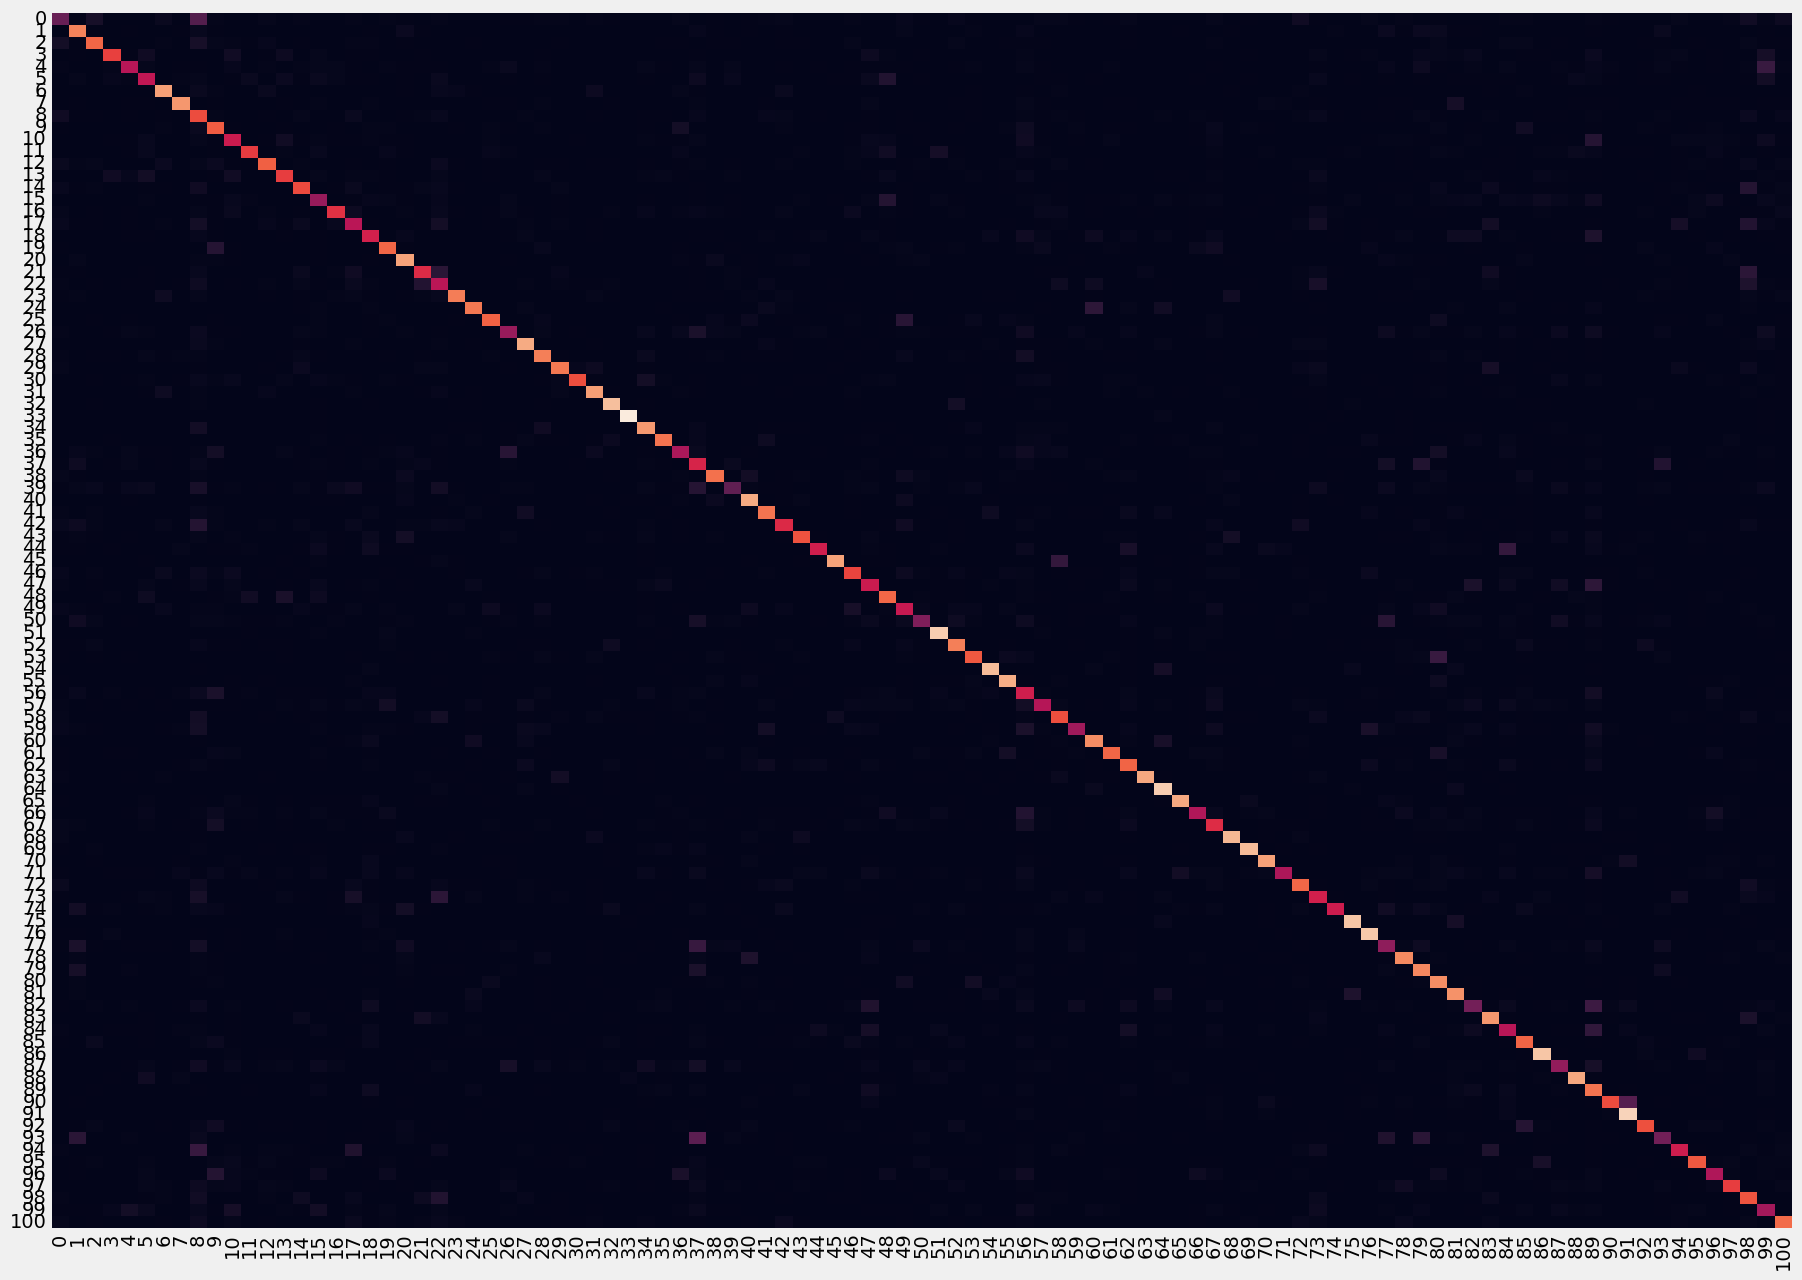

In [176]:
plt.figure(figsize=(20,15))
sns.heatmap(annot=False, data=cm, yticklabels=True, xticklabels=True, cmap="rocket",cbar=False, fmt='g')

# Fix what gone wrong

In [293]:
filepaths = os.listdir("/mnt/c/Users/iosif/Desktop/Python/Tensorflow/101_food_classes_10_percent/test/")
files = []
new_f = []
#-----
for f in filepaths:
    files.append(os.listdir(f"/mnt/c/Users/iosif/Desktop/Python/Tensorflow/101_food_classes_10_percent/test/{f}"))
#-----
for i in files:
    new_f.extend(i)

'baklava'

In [311]:
class_names = test_data.class_names

pred_df= pd.DataFrame({"img_path": new_f,
                       "y_true": y_labels,
                       "y_pred": pred_classes,
                       "pred_conf": pred_props.max(axis=1),
                       "y_true_classname":[class_names[i]for i in y_labels],
                       "y_pred_classnames": [class_names[i]for i in pred_classes]})

In [ ]:
pred_df["pred_correct"] = pred_df["y_true"] == pred_df["y_pred"]

pred_df.sort_values(inplace=True,ascending=False, by=["pred_conf"])
pred_df[pred_df["pred_correct"] == False]  

# Play with the model

In [257]:
def food_prediction():
    screenshots_folder = os.listdir("/mnt/c/Users/iosif/Pictures/Screenshots")
    latest_shot = screenshots_folder[-1]
    test_image = tf.keras.preprocessing.image.load_img(target_size=(224,224),path=f"/mnt/c/Users/iosif/Pictures/Screenshots/{latest_shot}")
    test_image = tf.keras.preprocessing.image.img_to_array(img=test_image)
    test_image = tf.reshape(test_image, (1, 224,224,3))
    test_image = loaded_efi.predict(test_image)
    prediction_num = test_image.argmax()
    actual_prediction = train_data_10p.class_names[prediction_num]
    return actual_prediction

In [258]:
food_prediction()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


'french_fries'